# Logistic Regression
---

<a id="learning-objectives"></a>
### Learning Objectives
- Recall how to perform linear regression in scikit-learn.
- Demonstrate why logistic regression is a better alternative for classification than linear regression.
- Understand the concepts of probability, odds, e, log, and log-odds in relation to machine learning.
- Explain how logistic regression works.
- Interpret logistic regression coefficients.
- Use logistic regression with categorical features.
- Compare logistic regression with other models.

### Lesson Guide
- [Refresher: Fitting and Visualizing a Linear Regression Using scikit-learn](#refresher-fitting-and-visualizing-a-linear-regression-using-scikit-learn)
- [Refresher: Interpreting Linear Regression Coefficients](#refresher-interpreting-linear-regression-coefficients)
- [Predicting a Categorical Response](#predicting-a-categorical-response)
- [Using Logistic Regression for Classification](#using-logistic-regression-for-classification)
- [Probability, e, Log, and Log Odds](#probability-odds-e-log-and-log-odds)
	- [Understanding e and the Natural Logarithm](#understanding-e-and-the-natural-logarithm)
	- [Log Odds](#the-log-odds)
- [What Is Logistic Regression?](#what-is-logistic-regression)
- [Interpreting Logistic Regression Coefficients](#interpreting-logistic-regression-coefficients)
- [Comparing Logistic Regression to Other Models](#comparing-logistic-regression-to-other-models)

# Introduction

In this lesson we learn about Logistic Regression, or what is sometimes referred to as Logistic Classification.

"How can a model be both a Regression and a Classification?" you may ask.  


## Discussion

Have you ever had to sort objects, but everything didn't fit perfectly into groups?

Example:
- Movies/Books
- Socks
- Phone apps


Logistic Regression/Classification uses elements from both the Linear Regression and the K Nearest Neighbors algorithms.

<a id="refresher-fitting-and-visualizing-a-linear-regression-using-scikit-learn"></a>
## Refresher: Fitting and Visualizing a Linear Regression Using scikit-learn
---

Use Pandas to load in the glass attribute data from the UCI machine learning website. The columns are different measurements of properties of glass that can be used to identify the glass type. For detailed information on the columns in this data set, [please see the included .names file](http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.names).

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
#1 Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

    100% |████████████████████████████████| 993kB 19.7MB/s 


In [0]:
#2. Get the file
#make sure you upload all your data files to your Google drive and change share->Advanced->change->anyone with the link can view
downloaded = drive.CreateFile({'id':'1AmHHWlRe3WnjgFWI5k-d3OZ5rZcLq7SM'}) # replace the id with id of file you want to access
downloaded.GetContentFile('glass.csv')

In [0]:
glass = pd.read_csv('glass.csv')

In [0]:
# change columns to something more uniform
glass.columns = ['ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


**Data Dictionary**

- `Id`: number: 1 to 214
- `RI`: refractive index  
- `Na`: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
- `Mg`: Magnesium
- `Al`: Aluminum
- `Si`: Silicon
- `K` : Potassium
- `Ca`: Calcium
- `Ba`: Barium
- `Fe`: Iron
- `Type` : Type of glass:

<a id="refresher-interpreting-linear-regression-coefficients"></a>
## Refresher: Interpreting Linear Regression Coefficients
---

Recall the simple linear regression equation is $y = \beta_0 + \beta_1x$

$\beta_0$ is the intercept and $\beta_1$ is, in this case, our coefficient on the linear predictor(straight line).

---

In [0]:
#Show a ranked feature (column variable) list as correlated to the target, 'glass_type'
glass.corr(method='pearson')

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
ri,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
k,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
glass_type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


In [0]:
glass.corr().abs().glass_type.sort_values(ascending=False)

glass_type    1.000000
mg            0.744993
al            0.598829
ba            0.575161
na            0.502898
fe            0.188278
ri            0.164237
si            0.151565
k             0.010054
ca            0.000952
Name: glass_type, dtype: float64

<a id="predicting-a-categorical-response"></a>
## Predicting a Single Categorical Response
---

Linear regression is appropriate when we want to predict the value of a continuous target/response variable, but what about when we want to predict membership in a class or category?

**Examine the glass type column in the data set. What are the counts in each category?**

In [0]:

#How many are in each type of glass types?
glass['glass_type'].value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: glass_type, dtype: int64

Say these types are subdivisions of broader glass types:

> **Window glass:** types 1, 2, and 3

> **Household glass:** types 5, 6, and 7

**Create a new `household` column that indicates whether or not a row is household glass, coded as 1 or 0, respectively.**

In [0]:
# Types 1, 2, 3 are window glass.
# Types 5, 6, 7 are household glass.
# glass.household = ???
glass['type']=glass['glass_type'].apply(lambda x: 'window glass' if x ==1 or x==2 or x==3 else 'household glass')
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,window glass
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,window glass
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,window glass
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,window glass
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,window glass


In [0]:
glass['household']=[0 if x in (1,2,3) else 1 for x in glass.glass_type]
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,type,household
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,window glass,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,window glass,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,window glass,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,window glass,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,window glass,0


In [0]:
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,type,household
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,window glass,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,window glass,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,window glass,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,window glass,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,window glass,0


In [0]:
#Get a random sample after 'household' is added
glass.sample(10)

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,type,household
82,1.51646,13.41,3.55,1.25,72.81,0.68,8.10,0.00,0.00,2,window glass,0
120,1.51844,13.25,3.76,1.32,72.40,0.58,8.42,0.00,0.00,2,window glass,0
206,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.00,7,household glass,1
50,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.00,0.16,1,window glass,0
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1,window glass,0
96,1.51841,13.02,3.62,1.06,72.34,0.64,9.13,0.00,0.15,2,window glass,0
62,1.52172,13.51,3.86,0.88,71.79,0.23,9.54,0.00,0.11,1,window glass,0
143,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.00,0.00,2,window glass,0
192,1.51623,14.20,0.00,2.79,73.46,0.04,9.04,0.40,0.09,7,household glass,1
78,1.51613,13.92,3.52,1.25,72.88,0.37,7.94,0.00,0.14,2,window glass,0


Let's change our task, so that we're predicting the `household` category using `al`. Let's visualize the relationship to figure out how to do this.

**Make a scatter plot comparing `al` and `household`.**

Text(0, 0.5, 'household')

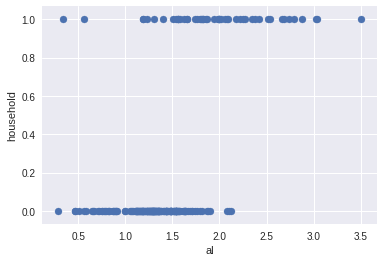

In [0]:
plt.scatter(glass.al, glass.household)
plt.xlabel('al')
plt.ylabel('household')

**Fit a new `LinearRegression` predicting `household` from `al`.**

Let's draw a linear regression line like we did before:

In [0]:
linreg = LinearRegression()

In [0]:
# Fit a linear regression model and store the predictions.
feature_cols = ['al']
X = glass[feature_cols] 
y = glass.household 

In [0]:
# fit(train) the model and 
# add the predicted value 'household_pred' as a new column to the dataframe glass
linreg.fit(X,y)
household_pred=linreg.predict(X)
glass['household_pred']=household_pred

In [0]:
# see if the newly added predicted value shows up as a new column
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,type,household,household_pred
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,window glass,0,0.065459
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,window glass,0,0.195765
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,window glass,0,0.285976
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,window glass,0,0.160682
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,window glass,0,0.135623


Text(0, 0.5, 'household')

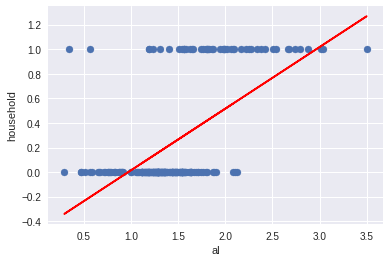

In [0]:
# Scatter plot that includes the regression line
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred, color='red')
plt.xlabel('al')
plt.ylabel('household')

If **al=3**, what class do we predict for household? **1**

If **al=1.5**, what class do we predict for household? **0**

We predict the 0 class for **lower** values of al, and the 1 class for **higher** values of al. What's our cutoff value? Around **al=2**, because that's where the linear regression line crosses the midpoint between predicting class 0 and class 1.

Therefore, we'll say that if **household_pred >= 0.5**, we predict a class of **1**, else we predict a class of **0**.

**Using this threshold, create a new column of our predictions for whether a row is household glass.**

In [0]:
# Understanding np.where
import numpy as np
nums = np.array([5, 15, 8])

# np.where returns the first value if the condition is True, and the second value if the condition is False.
np.where(nums > 10, 'big', 'small')

array(['small', 'big', 'small'], dtype='<U5')

In [0]:
# Transform household_pred to 1 or 0 and assign that to a new column 'household_pred_class' in the glass dataframe
# glass['household_pred_class'] = ???
glass['household_pred_class']=np.where(glass['household_pred']>0.5,1,0)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,type,household,household_pred,household_pred_class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,window glass,0,0.065459,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,window glass,0,0.195765,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,window glass,0,0.285976,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,window glass,0,0.160682,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,window glass,0,0.135623,0


In [0]:


# let's see few random samples after 'household_pred_class' is added
glass.sample(10)

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,type,household,household_pred,household_pred_class
183,1.51969,14.56,0.00,0.56,73.48,0.00,11.22,0.00,0.00,6,household glass,1,-0.205177,0
111,1.52739,11.02,0.00,0.75,73.08,0.00,14.96,0.00,0.00,2,window glass,0,-0.109953,0
91,1.51605,12.90,3.44,1.45,73.06,0.44,8.27,0.00,0.00,2,window glass,0,0.240870,0
70,1.51574,14.86,3.67,1.74,71.87,0.16,7.36,0.00,0.12,2,window glass,0,0.386212,0
182,1.51916,14.15,0.00,2.09,72.74,0.00,10.88,0.00,0.00,6,household glass,1,0.561624,1
156,1.51655,13.41,3.39,1.28,72.64,0.52,8.65,0.00,0.00,3,window glass,0,0.155670,0
195,1.51545,14.14,0.00,2.68,73.39,0.08,9.07,0.61,0.05,7,household glass,1,0.857318,1
92,1.51588,13.12,3.41,1.58,73.26,0.07,8.39,0.00,0.19,2,window glass,0,0.306023,0
87,1.51645,13.40,3.49,1.52,72.65,0.67,8.08,0.00,0.10,2,window glass,0,0.275953,0
138,1.51674,12.79,3.52,1.54,73.36,0.66,7.90,0.00,0.00,2,window glass,0,0.285976,0


**Plot a line that shows our predictions for class membership in household vs. not.**

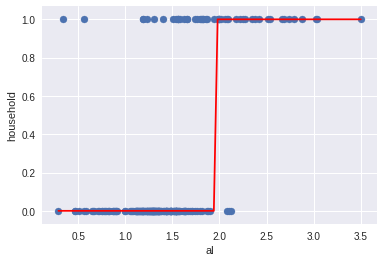

In [0]:
# sort so we can have a continuous line
glass.sort_values('al', inplace=True)
# Plot the class predictions.
plt.scatter(glass.al, glass.household)

plt.xlabel('al')
plt.ylabel('household')

plt.plot(glass.al, glass.household_pred_class, color='red');

<a id="using-logistic-regression-for-classification"></a>
## Using Logistic Regression for Classification
---

Logistic regression is a more appropriate method for what we just did with a linear regression. The values output from a linear regression cannot be interpreted as probabilities of class membership since their values can be greater than 1 and less than 0. Logistic regression, on the other hand, ensures that the values output as predictions can be interpreted as probabilities of class membership.

**Import the `LogisticRegression` class from `linear_model` below and fit the same regression model predicting `household` from `al`.**

In [0]:
# Fit a logistic regression model and store the class predictions.
logreg = LogisticRegression()

feature_cols = ['al']
X = glass[feature_cols]
y = glass.household

logreg.fit(X,y)
pred = logreg.predict(X)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**Plot the predicted class using the logistic regression as we did for the linear regression predictions above.**

As you can see, the class predictions are the same.

Text(0, 0.5, 'household')

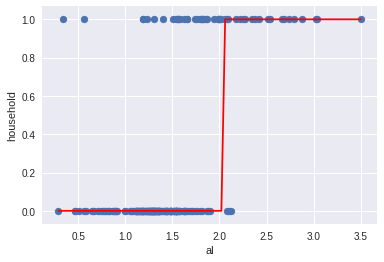

In [0]:
# Plot the class predictions.
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, pred, color='red')
plt.xlabel('al')
plt.ylabel('household')

What if we wanted the predicted probabilities instead of just the class predictions, to understand how confident we are in a given prediction?

**Using the built-in `.predict_proba()` function, examine the predicted probabilities for the first handful of rows of `X`.**

In [0]:
logreg.predict_proba(X)[0:10]

array([[0.97193375, 0.02806625],
       [0.96905681, 0.03094319],
       [0.96017962, 0.03982038],
       [0.96017962, 0.03982038],
       [0.9569876 , 0.0430124 ],
       [0.95265323, 0.04734677],
       [0.95265323, 0.04734677],
       [0.95080573, 0.04919427],
       [0.94378757, 0.05621243],
       [0.94271112, 0.05728888]])

In [0]:
logreg.score(X,y)

0.9205607476635514

Sklearn orders the columns according to our class labels. The two-column output of `predict_proba` returns a column for each class of our `household` variable. The first column is the probability of `household=0` for a given row, and the second column is the probability of `household=1`.

**Store the predicted probabilities of class=1 in its own column in the data set.**

In [0]:
# Store the predicted probabilities of class 1.
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]

In [0]:
glass.head(10)

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,type,household,household_pred,household_pred_class,household_pred_prob
21,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,window glass,0,-0.340495,0,0.028066
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,household glass,1,-0.315436,0,0.030943
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,window glass,0,-0.250283,0,0.039820
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,window glass,0,-0.250283,0,0.039820
50,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,window glass,0,-0.230236,0,0.043012
183,1.51969,14.56,0.00,0.56,73.48,0.00,11.22,0.0,0.00,6,household glass,1,-0.205177,0,0.047347
109,1.51818,13.72,0.00,0.56,74.45,0.00,10.99,0.0,0.00,2,window glass,0,-0.205177,0,0.047347
157,1.52121,14.03,3.76,0.58,71.79,0.11,9.65,0.0,0.00,3,window glass,0,-0.195154,0,0.049194
152,1.51779,13.64,3.65,0.65,73.00,0.06,8.93,0.0,0.00,3,window glass,0,-0.160071,0,0.056212
103,1.52725,13.80,3.15,0.66,70.57,0.08,11.64,0.0,0.00,2,window glass,0,-0.155059,0,0.057289


**Plot the predicted probabilities as a line on our plot (probability of `household=1` as `al` changes).**

Text(0, 0.5, 'household')

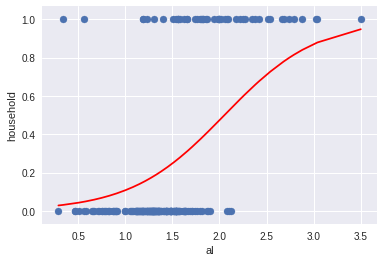

In [0]:
# Plot the predicted probabilities.
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [0]:
# Examine some example predictions.
#print(logreg.predict_proba(1).reshape(1,-1))
#print(logreg.predict_proba(2))
#print(logreg.predict_proba(3))

### Exercise 1:

- Build and train a logistic regression model.
- Select 2 features as your X
- y will remain the same `glass.household`
- Evaluate the model with `logreg.score` on the testing data.

In [0]:
# A:# Fit a logistic regression model and store the class predictions.
logreg = LogisticRegression()

feature_cols = ['al','mg','ca']
X = glass[feature_cols]
y = glass.household

logreg.fit(X,y)
pred = logreg.predict(X)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
logreg.predict_proba(X)[0:10]

array([[0.99794785, 0.00205215],
       [0.49089083, 0.50910917],
       [0.9976111 , 0.0023889 ],
       [0.9976111 , 0.0023889 ],
       [0.99736485, 0.00263515],
       [0.67979609, 0.32020391],
       [0.66542046, 0.33457954],
       [0.99671854, 0.00328146],
       [0.99446194, 0.00553806],
       [0.99457518, 0.00542482]])

In [0]:
# Store the predicted probabilities of class 1.
glass['household_pred_prob_multi'] = logreg.predict_proba(X)[:, 1]

In [0]:
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,type,household,household_pred,household_pred_class,household_pred_prob,household_pred_prob_multi
21,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,window glass,0,-0.340495,0,0.028066,0.002052
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,household glass,1,-0.315436,0,0.030943,0.509109
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,window glass,0,-0.250283,0,0.039820,0.002389
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,window glass,0,-0.250283,0,0.039820,0.002389
50,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,window glass,0,-0.230236,0,0.043012,0.002635


In [0]:
logreg.score(X,y)

0.9205607476635514

<a id="probability-odds-e-log-and-log-odds"></a>
## Probability, e, Log, and Log Odds
---

To understand how logistic regression predicts the probability of class membership we need to start by understanding the relationship between probability, odds ratios, and log odds ratios. This is because logistic regression predicts log odds and so reading log odds is extremely useful for interpreting logistic regression.

$$probability = \frac {no. of mactching\ outcome} {no.of all\ outcomes}$$

$$odds = \frac {no. of mactchin\ outcome} {no.of all\ other\ outcomes}$$

It is often useful to think of the numeric odds as a ratio. For example, 5/1 = 5 odds is "5 to 1" -- five wins for every one loss (e.g. of six total plays). 2/3 odds means "2 to 3" -- two wins for every three losses (e.g. of five total plays).

Examples:

- Dice roll of 1: probability = 1/6, odds = 1/5
- Even dice roll: probability = 3/6, odds = 3/3 = 1
- Dice roll less than 5: probability = 4/6, odds = 4/2 = 2

$$odds = \frac {probability} {1 - probability}$$

$$probability = \frac {odds} {1 + odds}$$

**As an example we can create a table of probabilities vs. odds, as seen below.**

In [0]:
# Create a table of probability versus odds.
table = pd.DataFrame({'probability':[0.1, 0.2, 0.25, 0.5, 0.6, 0.8, 0.9]})
table['odds'] = table.probability / (1 - table.probability)
table

,probability,odds
0,0.10,0.111111
1,0.20,0.250000
2,0.25,0.333333
3,0.50,1.000000
4,0.60,1.500000
5,0.80,4.000000
6,0.90,9.000000


<a id="understanding-e-and-the-natural-logarithm"></a>
### Understanding e and the Natural Logarithm

What is e? It is the base rate of growth shared by all continually growing processes:

e is the irrational base of the natural log `ln`.

- 2.718281828459

In [0]:
# Exponential function: e^1
e = np.exp(1)
e

2.718281828459045

What is a (natural) log? It gives you the time needed to reach a certain level of growth:

In [0]:
# Time needed to grow 1 unit to 2.718 units
# ln e = 1
np.log(2.718281828459) # very close to previous value

0.9999999999999832

In [0]:
np.log(e)

1.0

It is also the inverse of the exponential function:

In [0]:
# e^5
np.exp(5)

148.4131591025766

In [0]:
# np.exp(5)
2.7182818**5

148.41315133352072

In [0]:
# Taking the log of the exponential returns back to original input
np.log(np.exp(5))

5.0

Lets take one of our odds from out table and walk through how it works.

In [0]:
# Odds = 0.25
# ln 0.25 = -1.38629436
np.log(0.25)

-1.3862943611198906

In [0]:
print(e**-1.3862943611198906)
print(np.exp(-1.3862943611198906))

0.25000000000000006
0.25


<a id="the-log-odds"></a>

When we take the logarithm of the odds, we get what is known as the **log odds**. This may seem like an arbitrary transformation, but it has an important property: The log odds has the range $[-\infty, \infty]$. This is not true for the odds ratio, which can never be a negative number.

In [0]:
# Add log odds to the table.
table['logodds'] = np.log(table['odds'])
table

,probability,odds,logodds
0,0.10,0.111111,-2.197225
1,0.20,0.250000,-1.386294
2,0.25,0.333333,-1.098612
3,0.50,1.000000,0.000000
4,0.60,1.500000,0.405465
5,0.80,4.000000,1.386294
6,0.90,9.000000,2.197225


<a id="what-is-logistic-regression"></a>
## What Is Logistic Regression?
---

Linear regression: Continuous response is modeled as a linear combination of the features.

$$y = \beta_0 + \beta_1x$$

Logistic regression: Log odds of a categorical response being "true" (1) is modeled as a linear combination of the features.

$$\log \left({p\over 1-p}\right) = \beta_0 + \beta_1x$$

This is called the logit function.

Probability is sometimes written as pi.

$$\log \left({\pi\over 1-\pi}\right) = \beta_0 + \beta_1x$$

The equation can be rearranged into the logistic function.

$$\hat{p} = \frac{e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$$

In other words:

- Logistic regression outputs the probabilities of a specific class.
- Those probabilities can be converted into class predictions.

The logistic function has some nice properties:

- Takes on an "s" shape
- Output is bounded by 0 and 1

Changing the $\beta_0$ value shifts the curve horizontally, whereas changing the $\beta_1$ value changes the slope of the curve.

<a id="comparing-logistic-regression-to-other-models"></a>
## Comparing Logistic Regression to Other Models
---

Advantages of logistic regression:

- Highly interpretable.
- Model training and prediction are fast.
- No tuning is required.
- Can perform well with a small number of observations.
- Outputs well-calibrated predicted probabilities.

Disadvantages of logistic regression:

- Presumes a linear relationship between the features and the log odds of the response.
- Performance is (generally) not competitive with the best supervised learning methods.